In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Exploring The Target Variable

The question one should usually find answers to while exploring the Target Variable


1.What information does this variable Respresent?

2.type of Variable

3.What is the statics of the T.V

4.Does the Target Variable contains any outlier that we need to Treat?

5. Are there any missing Values

6.Distribution of the Target Variable

# Univariate Analysis:- Studying one variable alone

Eyeballing

In [2]:
Raw_Housing_Data=pd.read_csv("1. Regression - Module - (Housing Prices).csv")

In [3]:
Raw_Housing_Data["Sale Price"].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

In [4]:
# missing Values=21613-21609=4
#  Sale Price has quite a bit of range from 75k to 7.7million
# The mean value and median are not same which means our data is not normally distributed
# The mean value is higher thean median which means the data may contain few outlier of high values or could be skewed toward lower values i.e contains more data point of lower values.

# Finding Outliers:-a data point that is distant from rest of the Observation

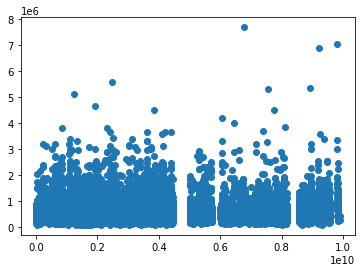

In [5]:
plt.scatter(x=Raw_Housing_Data["ID"],y=Raw_Housing_Data["Sale Price"])

In [6]:
# IQR=Q3-Q1=645000-321950=323050
# Lower Limiy=Q1-1.5*IQR or mim of te Data
# Upper Limit=Q3+1.5*IQR of Maxm of the Data
# Any data Point which is higher than upper limit nad lower than the lower limit can be termed as Outlier.


In [7]:
import seaborn as sns

<AxesSubplot:xlabel='Sale Price'>

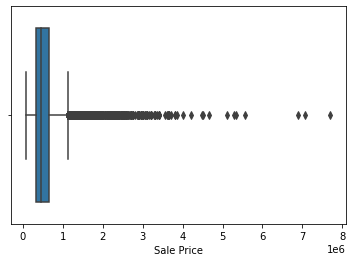

In [8]:
sns.boxplot(x=Raw_Housing_Data["Sale Price"])

In [9]:
## Different ways of Treating Outliers
# 1.Deletion:-The entire row containing outlier is removed
# 2.Capping and Imputing:-Outlier is replaced by mean ,median, mode
# 3.Data Transformation:-the variable is transformed to its lig value or square or cube Root values
# 4.Binning:-Different bins are formed based on the values of the variable to treat the outlier

We treat here Outlier by Imputation

In [10]:
q1=Raw_Housing_Data["Sale Price"].quantile(.25)
q3=Raw_Housing_Data["Sale Price"].quantile(.75)
iqr=q3-q1
iqr

323050.0

In [11]:
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
upper_limit,lower_limit

(1129575.0, -162625.0)

In [12]:
def limit_imputer(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return lower_limit
    else:
        return value

In [13]:
Raw_Housing_Data["Sale Price"]=Raw_Housing_Data["Sale Price"].apply(limit_imputer)

In [14]:
Raw_Housing_Data["Sale Price"].describe()
# Maxm value is now replaced by upper_limit value

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

In [15]:
# Here Mean>Median:-data is not normally distributed and bit skewed towards lower values

# Treatment of Missing Values

1.Missing values can reduce the performance of the model

2.Any row which has a missing value either for target variable or any of the independent variables cant be used for building the model

Ways of treating Missing Values

1.Deletion:-The entire row containing missing values is removed

2.Imputing:-replaced with mean median or mode values

Avoid the imputation of the Target variable as much as we can
Deletion of te missing value in Target Variable is preferred 

In [16]:
Raw_Housing_Data.dropna(inplace=True,axis=0,subset=["Sale Price"])

In [17]:
Raw_Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

Text(0.5, 1.0, 'Histogram of Selling Price')

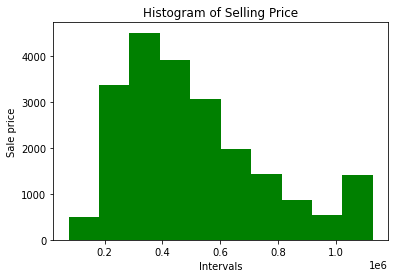

In [18]:
plt.hist(Raw_Housing_Data["Sale Price"],bins=10,color="green")
plt.xlabel("Intervals")
plt.ylabel("Sale price")
plt.title("Histogram of Selling Price")


In [19]:
# The data is skewed towards lower values

# Data Exploration-Independent Numerical Variables

#  Treating Missing Values in Independent Variables

Delation-Recommonded for Target Variables

Imputation-recommonded for Independent Variables

In [20]:
# Missing ValueImputation can be done using the:-
# .Mean and median for continuous variable
# .Mode for Object Variable

In [21]:
Raw_Housing_Data.to_csv("Row_Housing_Prices2.csv") # tO CHANGE in THE csv fILE

In [22]:
Raw_Housing_Data=pd.read_csv("Row_Housing_Prices2.csv")

In [23]:
Raw_Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 21609 non-null  int64  
 1   ID                                         21609 non-null  int64  
 2   Date House was Sold                        21609 non-null  object 
 3   Sale Price                                 21609 non-null  float64
 4   No of Bedrooms                             21609 non-null  int64  
 5   No of Bathrooms                            21605 non-null  float64
 6   Flat Area (in Sqft)                        21600 non-null  float64
 7   Lot Area (in Sqft)                         21600 non-null  float64
 8   No of Floors                               21609 non-null  float64
 9   Waterfront View                            21609 non-null  object 
 10  No of Times Visited   

In [24]:
numerical_column=["No of Bathrooms","Flat Area (in Sqft)","Lot Area (in Sqft)","Area of the House from Basement (in Sqft)","Latitude","Longitude","Living Area after Renovation (in Sqft)"]

In [25]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="median")
Raw_Housing_Data[numerical_column]=imputer.fit_transform(Raw_Housing_Data[numerical_column])
# "fit_transform" involve two steps
# Fitting Phase:- The Function calculates the median value with respect to every columnthat we have Passed in as a Parameter and stores it
# Transformation Phase:-The Function does the actual action of locating the missing values and imputing them using the median strategy

In [26]:
Raw_Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 21609 non-null  int64  
 1   ID                                         21609 non-null  int64  
 2   Date House was Sold                        21609 non-null  object 
 3   Sale Price                                 21609 non-null  float64
 4   No of Bedrooms                             21609 non-null  int64  
 5   No of Bathrooms                            21609 non-null  float64
 6   Flat Area (in Sqft)                        21609 non-null  float64
 7   Lot Area (in Sqft)                         21609 non-null  float64
 8   No of Floors                               21609 non-null  float64
 9   Waterfront View                            21609 non-null  object 
 10  No of Times Visited   

In [27]:
# imputer=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
# Raw_Housing_Data["Zipcode"]=imputer.fit_transform(Raw_Housing_Data["Zipcode"])

In [28]:
Raw_Housing_Data["Zipcode"].shape

(21609,)

In [29]:
column=Raw_Housing_Data["Zipcode"].values.reshape(-1,1)
column.shape

(21609, 1)

In [30]:
imputer=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
Raw_Housing_Data["Zipcode"]=imputer.fit_transform(column)

In [31]:
Raw_Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 21609 non-null  int64  
 1   ID                                         21609 non-null  int64  
 2   Date House was Sold                        21609 non-null  object 
 3   Sale Price                                 21609 non-null  float64
 4   No of Bedrooms                             21609 non-null  int64  
 5   No of Bathrooms                            21609 non-null  float64
 6   Flat Area (in Sqft)                        21609 non-null  float64
 7   Lot Area (in Sqft)                         21609 non-null  float64
 8   No of Floors                               21609 non-null  float64
 9   Waterfront View                            21609 non-null  object 
 10  No of Times Visited   

# Variable Transformation

Variable Transformation refers to the process of making changes to a variable in a way that it becomes more useful and meaningful for analysis and modeling Purpose.

Some reason for variable Transformation
1.Outlier Tratment  3.change in information representable formate

In [32]:
Raw_Housing_Data=pd.read_csv("Raw_Housing_Prices3.csv")

In [33]:
Raw_Housing_Data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [34]:
Raw_Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

It would make sense to convert zipcode variable data type into a categorical variable where
1. Sale Price in each zip code can be analysed 
2. Variation across zipcode can be seen

In [35]:
Raw_Housing_Data["Zipcode"]=Raw_Housing_Data["Zipcode"].astype(object)

In [36]:
Raw_Housing_Data.dtypes

ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                       object
Latitude                                     float64
Longitude                                    f

In [37]:
Raw_Housing_Data["No of Times Visited"].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [38]:
mapping={"None":"0","Once":"1","Twice":"2","Thrice":"3","Four":"4"}
Raw_Housing_Data["No of Times Visited"]=Raw_Housing_Data["No of Times Visited"].map(mapping)

In [39]:
Raw_Housing_Data["No of Times Visited"].unique()

array(['0', '3', '4', '2', '1'], dtype=object)

To derive a new variable from an existing variable or combining two variables to transform a variable so that it becomes more useful

# Derive Two new variable from the Variable Renovated Year 1.Ever Renovated  2.Year Since Renovation

In [40]:
Raw_Housing_Data["Ever Renovate"]=np.where(Raw_Housing_Data["Renovated Year"]==0,"No","Yes")

In [41]:
Raw_Housing_Data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovate
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,No
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,No


In [42]:
Raw_Housing_Data["Purchase Year"]=pd.DatetimeIndex(Raw_Housing_Data["Date House was Sold"]).year

In [43]:
Raw_Housing_Data["Years Since Renovation"]=np.where(Raw_Housing_Data["Ever Renovate"]=="Yes",abs(Raw_Housing_Data["Purchase Year"]-Raw_Housing_Data["Renovated Year"]),0)

In [44]:
Raw_Housing_Data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovate,Purchase Year,Years Since Renovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,63,0,98178.0,47.5112,-122.257,1340.0,5650,No,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,85,0,98028.0,47.7379,-122.233,2720.0,8062,No,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,53,0,98136.0,47.5208,-122.393,1360.0,5000,No,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,31,0,98074.0,47.6168,-122.045,1800.0,7503,No,2016,0


In [45]:
Raw_Housing_Data.drop(columns=["Purchase Year",'Date House was Sold',"Renovated Year"],inplace=True)

In [46]:
Raw_Housing_Data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovate,Years Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [47]:
Raw_Housing_Data.to_csv("Transformed_Housing_Data",index=False)

# Correlation

In [48]:
Transformed_Housing_Data=pd.read_csv("Transformed_Housing_Data (2).csv")

In [49]:
Transformed_Housing_Data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [50]:
Transformed_Housing_Data["Sale Price"].corr(Transformed_Housing_Data["Flat Area (in Sqft)"])

0.6951704258420668

In [51]:
np.corrcoef(Transformed_Housing_Data["Sale Price"],Transformed_Housing_Data["Flat Area (in Sqft)"])

array([[1.        , 0.69517043],
       [0.69517043, 1.        ]])

In [52]:
Transformed_Housing_Data.drop(columns=["ID"]).corr()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation
Sale Price,1.000000,0.339407,0.535124,0.695170,0.101319,0.298913,0.356114,0.680914,0.606527,0.307513,-0.064306,-0.043047,0.402430,0.045401,0.629944,0.092325,0.065907
No of Bedrooms,0.339407,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,-0.152760,-0.008708,0.129569,0.391771,0.029264,-0.007198
No of Bathrooms,0.535124,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,-0.203951,0.024570,0.223171,0.568568,0.087226,0.003551
Flat Area (in Sqft),0.695170,0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,-0.199380,0.052538,0.240091,0.756185,0.183223,0.023503
Lot Area (in Sqft),0.101319,0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,-0.129551,-0.085719,0.229449,0.144507,0.718527,0.013835
No of Floors,0.298913,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,-0.059222,0.049692,0.125620,0.280106,-0.011204,-0.000901
No of Times Visited,0.356114,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,0.084830,0.006162,-0.078453,0.280452,0.072561,0.093546
Overall Grade,0.680914,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,-0.185844,0.111226,0.201736,0.681362,0.107581,-0.024388
Area of the House from Basement (in Sqft),0.606527,0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,-0.261124,-0.000819,0.343793,0.731996,0.194106,0.010491
Basement Area (in Sqft),0.307513,0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,0.074933,0.110451,-0.144822,0.200302,0.017263,0.029158


Only those variables should be selected for building the model which have high correlation ,positive or -ve , with the target Variable

if two independent variables that are highly correlated with each other , are also correlated with the dependent variable using both independent variables in the model may result in a suboptimal or poorly understood model

While selecting input variables for the model ,look at correlation between independent variables.
if two independent variables have high correlation with each other above a certain value, make a conscious choic of which one to keep in the model.

## Data Exploration Categorical variabe

In [53]:
Transformed_Housing_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Sale Price                                 21609 non-null  float64
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21609 non-null  float64
 5   Lot Area (in Sqft)                         21609 non-null  float64
 6   No of Floors                               21609 non-null  float64
 7   Waterfront View                            21609 non-null  object 
 8   No of Times Visited                        21609 non-null  int64  
 9   Condition of the House                     21609 non-null  object 
 10  Overall Grade         

In [54]:
Transformed_Housing_Data.drop(columns="ID",inplace=True)

In [55]:
# Caregorical Variables are:-
# 1.Water front View
# 2.Condition of the House
# 3.Zipcode
# 4.Ever Renovated

In [56]:
Transformed_Housing_Data["Condition of the House"].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

Is condition of house is ordinal categorical variable or nominal categorical variable
1. The "Condition of the House" is ordinal Categorical variable as there is a sense of order among levels where Excellent>Good>Fair>Okay>Bad

<AxesSubplot:xlabel='Condition of the House'>

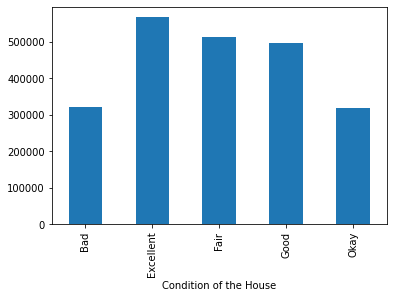

In [57]:
Transformed_Housing_Data.groupby("Condition of the House",)["Sale Price"].mean().plot(kind="bar")

<AxesSubplot:xlabel='Condition of the House'>

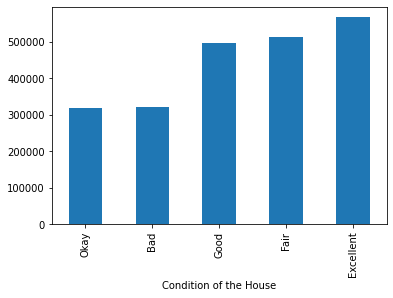

In [58]:
Transformed_Housing_Data.groupby('Condition of the House',
                                )['Sale Price'].mean().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Waterfront View'>

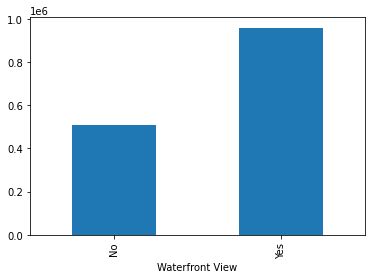

In [59]:
Transformed_Housing_Data.groupby('Waterfront View',
                                )['Sale Price'].mean().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Ever Renovated'>

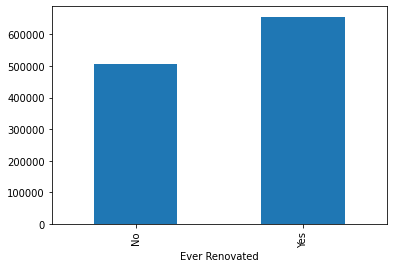

In [60]:
Transformed_Housing_Data.groupby('Ever Renovated',
                                )['Sale Price'].mean().sort_values().plot(kind = 'bar')

<AxesSubplot:xlabel='Zipcode'>

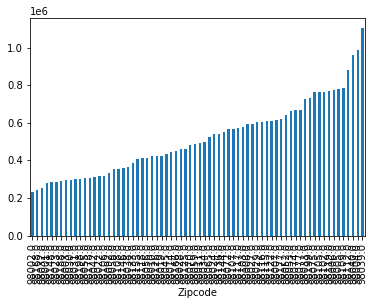

In [61]:
Transformed_Housing_Data.groupby('Zipcode',
                                )['Sale Price'].mean().sort_values().plot(kind = 'bar')

# ANOVA

The method of finding out whether a categorical variable is having an impact on the numerical variable-ANOVA
1.However ,ANOVA can not quantify the relationship between a categorical variable and a numerical variable

ANOVA stands for Analysis of Variance

1.It checks if the means ,i.e, average value of the target variable across different levels or unique values of a categorical variable are equal or not.

2.It assesses the importance of one or more levels by comparing the means of the target variable at different level of the categorical variable

In [62]:
# Two Hypothesis are 
# 1. Null Hypothesis:-There is no difference in mean
# 2.alternate Hypothesis:-At least one of the means is different

In [63]:
import warnings
warnings.filterwarnings("ignore")

In [64]:
Transformed_Housing_Data  = pd.read_csv('Transformed_Housing_Data')

In [65]:
Transformed_Housing_Data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovate,Years Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [66]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [67]:
Transformed_Housing_Data  = Transformed_Housing_Data.rename(columns = {'Sale Price' : 'Sale_Price'})

In [68]:
Transformed_Housing_Data  = Transformed_Housing_Data.rename(columns = {'Condition of the House' : 'Condition_of_the_House'})

In [69]:
Transformed_Housing_Data  = Transformed_Housing_Data.rename(columns = {'Ever Renovate' : 'Ever_Renovated'})

In [70]:
Transformed_Housing_Data  = Transformed_Housing_Data.rename(columns = {'Waterfront View' : 'Waterfront_View'})

In [71]:
Transformed_Housing_Data.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Condition_of_the_House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Years Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [72]:
Transformed_Housing_Data['Waterfront_View'].unique()

array(['No', 'Yes'], dtype=object)

In [73]:
Transformed_Housing_Data['Waterfront_View'].unique()

array(['No', 'Yes'], dtype=object)

In [74]:
mod = ols('Sale_Price ~ Condition_of_the_House', data  = Transformed_Housing_Data).fit()

In [75]:
Anova_Table = sm.stats.anova_lm( mod, typ = 2)

In [76]:
print(Anova_Table)

                              sum_sq       df         F        PR(>F)
Condition_of_the_House  1.441831e+13      4.0  58.25563  5.447605e-49
Residual                1.336752e+15  21604.0       NaN           NaN


In [77]:
mod = ols('Sale_Price ~ Waterfront_View', data  = Transformed_Housing_Data).fit()
sm.stats.anova_lm( mod, typ = 2)

,sum_sq,df,F,PR(>F)
Waterfront_View,3.283737e+13,1.0,538.192683,1.275558e-117
Residual,1.318333e+15,21607.0,NaN,NaN


In [78]:
mod = ols('Sale_Price ~ Waterfront_View', data  = Transformed_Housing_Data).fit()
sm.stats.anova_lm( mod, typ = 2)

,sum_sq,df,F,PR(>F)
Waterfront_View,3.283737e+13,1.0,538.192683,1.275558e-117
Residual,1.318333e+15,21607.0,NaN,NaN


In [79]:
mod = ols('Sale_Price ~ Ever_Renovated', data  = Transformed_Housing_Data).fit()
sm.stats.anova_lm( mod, typ = 2)

,sum_sq,df,F,PR(>F)
Ever_Renovated,1.998463e+13,1.0,324.378469,5.419055e-72
Residual,1.331185e+15,21607.0,NaN,NaN


In [80]:
mod = ols('Sale_Price ~ Zipcode', data  = Transformed_Housing_Data).fit()
sm.stats.anova_lm( mod, typ = 2)

,sum_sq,df,F,PR(>F)
Zipcode,2.503765e+12,1.0,40.112844,2.444308e-10
Residual,1.348666e+15,21607.0,NaN,NaN


Two values are obtained from Anova
# F-Value a large value
# P- value<.05
then we reject null hypothesis(There is no diffenence in Mean)
and accept Alternate Hypothesis(Means are different and the categorical variable does have an impact on target variable)


if p-value<.05:- There is less than 5% probability that the difference in means is purely a coincidence. One can be 95% or more confident that the difference in mean actually exists

# two Types of ANOVA

One -Way ANOVA- it deals with one independent variable only

Two-Way Annova-IT deals with two or more independent variables

# Annova can find if a variable has an impact on other or not.
it can not find how strong or weak is the impact

# CREATION OF DUMMY VARIABLES

it refers to the process of transforming a categorical variable into a set of numerival or boolean variables, called dummy variables each of which has values of 0 or 1.

The no of dummy variables created for a categorical variable depends on the no of unique values or levels that categorical variable has.

# Redundant Dummy Variable
If a categorical variable has "n" levels, then "n-1" dummy variables are required


# Why do we need dummy Variable?
1.Regression model require all the independent variables to be Numerical.
2.By creating dummy variables, we transforms a categorical variable into a numerical variable.
3.After creating required dummy variables for a categorical variable, categorical variable is dropped from the data set.

In [81]:
Transformed_Housing_Data=pd.get_dummies(Transformed_Housing_Data,columns=["Condition_of_the_House"],drop_first=True)

In [82]:
Transformed_Housing_Data.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Overall Grade,...,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,7,...,47.5112,-122.257,1340.0,5650,No,0,0,1,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,7,...,47.7210,-122.319,1690.0,7639,Yes,26,0,1,0,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,6,...,47.7379,-122.233,2720.0,8062,No,0,0,1,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,7,...,47.5208,-122.393,1360.0,5000,No,0,1,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,8,...,47.6168,-122.045,1800.0,7503,No,0,0,1,0,0


In [83]:
Transformed_Housing_Data=pd.get_dummies(Transformed_Housing_Data,columns=["Ever_Renovated","Waterfront_View"],drop_first=True)

In [85]:
Transformed_Housing_Data.head()

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,-122.257,1340.0,5650,0,0,1,0,0,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,-122.319,1690.0,7639,26,0,1,0,0,1,0
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,...,-122.233,2720.0,8062,0,0,1,0,0,0,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,...,-122.393,1360.0,5000,0,1,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,...,-122.045,1800.0,7503,0,0,1,0,0,0,0


# Binning

If the number of levels for a categorical variable is more(say>20),then bin these levels into fewer groups before creating the dummy variables.

In [86]:
Zip_Table=Transformed_Housing_Data.groupby("Zipcode").agg({"Sale_Price":"mean"}).sort_values("Sale_Price",ascending=True)

In [87]:
Zip_Table.head()

,Sale_Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [89]:
Zip_Table["Zipcode_Group"]=pd.cut(Zip_Table["Sale_Price"],bins=10,labels=["Zipcode_Group_0","Zipcode_Group_1","Zipcode_Group_2","Zipcode_Group_3","Zipcode_Group_4","Zipcode_Group_5","Zipcode_Group_6","Zipcode_Group_7","Zipcode_Group_8","Zipcode_Group_9"],include_lowest=True)

In [90]:
Zip_Table=Zip_Table.drop(columns="Sale_Price")

The "Merge Function" of the Pandas library is used to merge two tables

An identifier or a variable (key or joining) parameter which is common in both tables is required for joining the table.

What do we mean by left Join?
1. Whentwo tables are joined based on the common key, one table will be the left and the other will be the right.
2.In the left join all rows of left table will be returned along with matching fields from the other table
3.In the Right join all elements of right table will be returned along with matching fields from the other table

In [91]:
Transformed_Housing_Data=pd.merge(Transformed_Housing_Data,Zip_Table,left_on="Zipcode",how="left",right_index=True)

In [92]:
Transformed_Housing_Data=Transformed_Housing_Data.drop(columns="Zipcode")

In [93]:
Transformed_Housing_Data.head(2)

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_Yes,Waterfront_View_Yes,Zipcode_Group
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,1340.0,5650,0,0,1,0,0,0,0,Zipcode_Group_0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,1690.0,7639,26,0,1,0,0,1,0,Zipcode_Group_2


In [94]:
Transformed_Housing_Data=pd.get_dummies(Transformed_Housing_Data,columns=["Zipcode_Group"],drop_first=True)

In [95]:
Transformed_Housing_Data.head(2)

,ID,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,...,0,0,1,0,0,0,0,0,0,0


In [96]:
Transformed_Housing_Data.to_csv("Transformed_Housing_Data_2.csv",index=False)

In [97]:
Transformed_Housing_Data_2=pd.read_csv("Transformed_Housing_Data_2.csv")

In [102]:
Transformed_Housing_Data_2=Transformed_Housing_Data_2.drop(columns="ID")

In [103]:
Transformed_Housing_Data_2.head(2)

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0


# Splitting Of Data

Splitting into dependent and independent Varable

In [104]:
Y=Transformed_Housing_Data_2.iloc[:,0]

In [105]:
X=Transformed_Housing_Data_2.iloc[:,1:31]

In [106]:
X.head(3)

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,...,0,0,0,0,0,0,0,0,0,0
1,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,...,0,0,1,0,0,0,0,0,0,0
2,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,...,0,0,1,0,0,0,0,0,0,0


Splitting into Train and Test Data

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.3)

In [110]:
X_train.shape

(15126, 30)

In [111]:
X_test.shape

(6483, 30)

In [112]:
Y_train.shape

(15126,)

In [113]:
X_test.shape

(6483, 30)

# FEATURE SCALING

Feature scaling is all about scaling the feature variables(i.e all the independent variables) into the same Range.

# The variation in magnitude and range of feature causes two problems:
    1.When the model is built, variables with higher magnitude and range will have more impact compared to the ones which are smaller.
    2.The model might not predict properly since it is not giving equal weight to both the variables.

# Feature Scaling
 1.The variables are selected to have similar magnitude and range so that model is not biased towards a particular variable
  2.Feature scaling is must for those algorithms where some measure of distance between data points is involved.


In [115]:
# Different Technique of Feature Scaling
# 1.Standardisation
# 2.Min max Scaling
# 3.Normalization

# Standardisation
it Rescales the feature values so that they have the properties of a standard Normal Distribution with mean as 0 and the standard deviation of 1.
# x=(x-mean)/S.D

# Min Max Scaling
one of the simplest method
1.The value Range for the Transformation variables lies between [0,1]
# x=(x-min)/(Max.-min)

# Normalization
The range is fixed from -1 to +1
Also called mean normalization
# x=(x-Mean)/(Max-min)


In [116]:
from sklearn import preprocessing
scale=preprocessing.StandardScaler()

In [117]:
X_train=scale.fit_transform(X_train)

In [118]:
X_train

array([[-0.41410999, -0.15580014, -0.61383587, ..., -0.11368551,
        -0.16837455, -0.05018523],
       [-0.41410999,  0.16751347, -0.35604981, ..., -0.11368551,
        -0.16837455, -0.05018523],
       [ 0.6896482 , -0.15580014, -0.42049633, ..., -0.11368551,
        -0.16837455, -0.05018523],
       ...,
       [ 0.6896482 , -0.15580014,  0.23470991, ..., -0.11368551,
        -0.16837455, -0.05018523],
       [-1.51786818,  0.16751347, -1.129408  , ..., -0.11368551,
        -0.16837455, -0.05018523],
       [ 0.6896482 ,  1.46076787,  1.54512239, ..., -0.11368551,
        -0.16837455, -0.05018523]])

In [119]:
X_test=scale.fit_transform(X_test)

In [120]:
X_test

array([[-0.36659537,  1.17870613, -0.667958  , ..., -0.10891293,
        -0.16995383, -0.04306306],
       [ 0.65036559,  0.19506863, -0.02567007, ..., -0.10891293,
        -0.16995383, -0.04306306],
       [-0.36659537, -0.13281053, -0.72429904, ..., -0.10891293,
        -0.16995383, -0.04306306],
       ...,
       [-1.38355632, -1.44432719, -1.47926907, ..., -0.10891293,
        -0.16995383, -0.04306306],
       [ 0.65036559,  0.5229478 ,  1.22510116, ..., -0.10891293,
        -0.16995383, -0.04306306],
       [ 0.65036559, -0.4606897 , -0.58908053, ..., -0.10891293,
        -0.16995383, -0.04306306]])